# VLDB 2020 - Demo
## WoMG: a Library for Word-of-Mouth Cascades Generation

In [1]:
from womg import womg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Definition of the inputs: graph as NetworkX instance and corpus as directory path. 

In [9]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = 'demo_corpus/'
prop = womg(graph=g, docs_path=docs_path, seed=42, virality_resistance=12.)

Formatting graph..



Creating interests..
Training LDA model..
Extracting topic distribution from docs in  demo_corpus/
Computing cascades.. 
WoMG diffusion has been completed.


### Main WoMG outputs: 
* bow of the documents,  
* topic distributions of the items, 
* interests of the nodes, 
* propagations.

In [10]:
# bag of words of the propagating items (DOCS x WORDS)
prop.docs

[{'reported': 1,
  'said': 3,
  'defense': 1,
  'embassy': 3,
  'emergency': 2,
  'france': 1,
  'general': 1,
  'government': 1,
  'killed': 2,
  'left': 2,
  'office': 2,
  'people': 3,
  'press': 2,
  'saturday': 1,
  'state': 1,
  'united': 1,
  'visited': 1,
  'announced': 1,
  'include': 1,
  'north': 1,
  'offered': 2,
  'states': 1,
  'addition': 1,
  'aid': 1,
  'city': 1,
  'countries': 1,
  'days': 1,
  'homeless': 2,
  'living': 1,
  'money': 2,
  'world': 1,
  'friday': 2,
  'miles': 1,
  'help': 1,
  'families': 1,
  'louis': 1,
  'officials': 2,
  'italy': 1,
  'victims': 1,
  'expected': 1,
  'affected': 1,
  'fund': 2,
  'total': 1,
  'provide': 2,
  'gov': 1,
  'caused': 1,
  'provided': 1,
  'check': 2,
  'britain': 1,
  'funds': 1,
  'civil': 1,
  'nicaragua': 1,
  'supplies': 2,
  'seriously': 1,
  'mountain': 1,
  'citizens': 1,
  'rains': 1,
  'brazil': 2,
  'consulate': 1,
  'resort': 1,
  'flooding': 1,
  'moreira': 1,
  'floods': 1,
  'janeiro': 2,
  'rio': 2,

In [11]:
# topic distribution of the propagating items (TOPICS x DOCS)
prop.topic_distributions

array([[3.74145180e-01, 2.38508806e-01],
       [1.25749204e-02, 3.91397451e-04],
       [1.54645905e-01, 2.09062975e-02],
       [2.58824177e-04, 1.66613507e-04],
       [1.04341998e-04, 6.71683229e-05],
       [1.11971006e-01, 3.69753987e-01],
       [1.16301258e-03, 7.48668914e-04],
       [2.10619834e-03, 1.34773040e-03],
       [2.98875297e-04, 1.92395717e-04],
       [8.03060393e-05, 5.16955988e-05],
       [3.22418243e-01, 2.61799574e-01],
       [1.26203778e-03, 4.47386950e-02],
       [6.67195360e-04, 5.21783158e-02],
       [1.65678542e-02, 8.02988093e-03],
       [1.73607992e-03, 1.11873855e-03]], dtype=float32)

The highest entry for item 0 is component 0, while for item 1 is component 5.

In [12]:
# interests for the nodes (TOPICS x NODES)
prop.interests

array([[0.2917144 , 1.68493438, 0.02302071, ..., 0.07142496, 0.        ,
        0.04433956],
       [0.16986373, 0.        , 7.78889377, ..., 0.14912563, 0.        ,
        0.        ],
       [0.10171634, 0.0308195 , 0.27840523, ..., 0.30556005, 0.46642842,
        0.15679172],
       ...,
       [5.80047269, 0.        , 0.12275605, ..., 0.19677601, 5.98339745,
        0.07109203],
       [0.07065024, 5.39709415, 0.01652012, ..., 0.59541126, 0.        ,
        0.58351514],
       [0.        , 0.11629766, 0.30404693, ..., 0.        , 0.        ,
        0.57988952]])

In [13]:
# propagations (DOCS x (TIME, NODE))
prop.propagations

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14),
  (0, 15),
  (0, 16),
  (0, 17),
  (0, 18),
  (0, 19),
  (0, 20),
  (0, 21),
  (0, 22),
  (0, 23),
  (0, 24),
  (0, 25),
  (0, 26),
  (0, 27),
  (0, 28),
  (0, 29),
  (0, 30),
  (0, 31),
  (0, 32),
  (0, 33),
  (0, 34),
  (0, 35),
  (0, 36),
  (0, 37),
  (0, 38),
  (0, 39),
  (0, 40),
  (0, 41),
  (0, 42),
  (0, 43),
  (0, 44),
  (0, 45),
  (0, 46),
  (0, 47),
  (0, 48),
  (0, 49),
  (0, 50),
  (0, 51),
  (0, 52),
  (0, 53),
  (0, 54),
  (0, 55),
  (0, 56),
  (0, 57),
  (0, 58),
  (0, 59),
  (0, 60),
  (0, 61),
  (0, 62),
  (0, 64),
  (0, 65),
  (0, 66),
  (0, 67),
  (0, 68),
  (0, 69),
  (0, 70),
  (0, 71),
  (0, 72),
  (0, 73),
  (0, 74),
  (0, 75),
  (0, 77),
  (0, 78),
  (0, 79),
  (0, 80),
  (0, 81),
  (0, 82),
  (0, 83),
  (0, 84),
  (0, 85),
  (0, 86),
  (0, 87),
  (0, 88),
  (0, 89),
  (0, 90),
  (0, 92),
  (0, 93),
  (0, 94)

### Displaying the output with NetworkX

In [14]:
def plot_graph(g, node_color, cmap=None):
    NODE_SIZE = 600
    plt.figure(figsize=(8, 8))
    pos = nx.get_node_attributes(g, 'pos')
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off')  

Firstly, we display the activated nodes

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


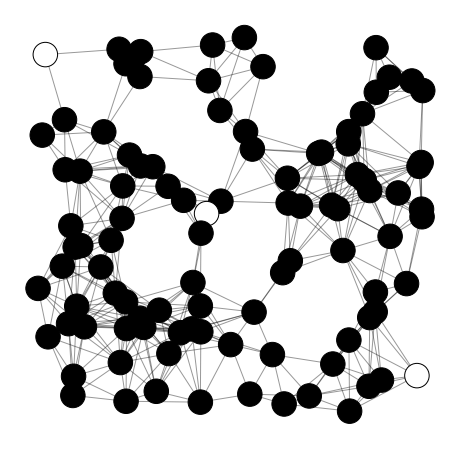

In [15]:
item = 0
activations = np.zeros(N)
for _time, node in prop.propagations[item]:
    activations[node] = 1
    
plot_graph(g, activations, plt.cm.binary)

Secondly, we plot the interest in the topic that best describes item 0: component 0 

In [ ]:
component = 0
plot_graph(g, prop.interests[component])